In [4]:
import os
from collections import defaultdict
from pathlib import Path
from getpass import getpass

import numpy as np
from astropy.time import Time
from astropy import table

from astroquery.mast import Observations

In [25]:
jwst_dl_dir = Path('mastDownload/JWST')

In [8]:
Observations.login(getpass('mast_token'))

mast_token ········


INFO: MAST API token accepted, welcome Erik Tollerud [astroquery.mast.auth]


In [9]:
obses = Observations.query_criteria(proposal_id=2609, obs_collection='JWST')
obses

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str8,int64,str4,str40,str27,float64,float64,float64,float64,float64,str8,str12,float64,float64,str1,str60,float64,str11,str14,str4,str2,str4,int64,str7,str156,str66,str67,str16,bool,float64,str7,str9,str9
image,2,JWST,jw02609008001_02101_00002_nrs1,UNKNOWN,290.21948,37.76622777777778,59811.67119774213,59811.67169481482,42.947,Infrared,F110W,1000.0,1300.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,59968.616192,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 290.246327921 37.799973377 290.170741635 37.802987501 290.173961978 37.862554945 290.249717581 37.858678431,mast:JWST/product/jw02609008001_02101_00002_nrs1_rate.jpg,mast:JWST/product/jw02609008001_02101_00002_nrs1_cal.fits,PUBLIC,False,nan,science,89376201,207408295
image,2,JWST,jw02609008001_02101_00002_nrs2,UNKNOWN,290.21948,37.76622777777778,59811.67119774213,59811.67169481482,42.947,Infrared,F110W,1000.0,1300.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,59968.616192,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 290.241778132 37.737177912 290.166000183 37.739231641 290.170476936 37.798769179 290.246064417 37.795826736,mast:JWST/product/jw02609008001_02101_00002_nrs2_rate.jpg,mast:JWST/product/jw02609008001_02101_00002_nrs2_cal.fits,PUBLIC,False,nan,science,89376203,207408313
image,2,JWST,jw02609008001_02101_00001_nrs1,UNKNOWN,290.21948,37.76622777777778,59811.66659922361,59811.6670962963,42.947,Infrared,F110W,1000.0,1300.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,59968.616192,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 290.246422498 37.800006359 290.170836212 37.803021018 290.174057231 37.862588439 290.249812825 37.858711389,mast:JWST/product/jw02609008001_02101_00001_nrs1_rate.jpg,mast:JWST/product/jw02609008001_02101_00001_nrs1_cal.fits,PUBLIC,False,nan,science,89376205,207408324
image,2,JWST,jw02609008001_02101_00001_nrs2,UNKNOWN,290.21948,37.76622777777778,59811.66659922361,59811.6670962963,42.947,Infrared,F110W,1000.0,1300.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,59968.616192,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 290.241871997 37.737210926 290.166094036 37.739265191 290.170571465 37.798802697 290.246158947 37.795859721,mast:JWST/product/jw02609008001_02101_00001_nrs2_rate.jpg,mast:JWST/product/jw02609008001_02101_00001_nrs2_cal.fits,PUBLIC,False,nan,science,89376208,207408342
image,3,JWST,jw02609-o001_t006_nircam_clear-f277w,M31-NIRCAM-PREIMAGING,11.5375,42.08777777777778,59810.65694376852,59810.67705800926,1223.994,Infrared,F277W,2416.0,3127.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60178.64913193,NIRCAM,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.625473441 42.084187605 11.550862946 42.027441797 11.455641664 42.096319719 11.530247976 42.153127206,mast:JWST/product/jw02609-o001_t006_nircam_clear-f277w_i2d.jpg,mast:JWST/product/jw02609-o001_t006_nircam_clear-f277w_i2d.fits,EXCLUSIVE_ACCESS,False,nan,science,89383611,207428599
image,3,JWST,jw02609-o001_t006_nircam_clear-f150w,M31-NIRCAM-PREIMAGING,11.5375,42.08777777777778,59810.65694302778,59810.67705800926,4895.976,Infrared,F150W,1331.0,1668.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60178.64913193,NIRCAM,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.625767061 42.083101034 11.549629513 42.027076891 11.454647273 42.098090208 11.530786158 42.154177134,mast:JWST/product/jw02609-o001_t006_nircam_clear-f150w_i2d.jpg,mast:JWST/product/jw02609-o001_t006_nircam_clear-f150w_i2d.fits,EXCLUSIVE_ACCESS,False,nan,science,89383635,207428588
...,...,...,...,...,...,...,...,...,...,...,...,

In [10]:
obses.colnames

['dataproduct_type',
 'calib_level',
 'obs_collection',
 'obs_id',
 'target_name',
 's_ra',
 's_dec',
 't_min',
 't_max',
 't_exptime',
 'wavelength_region',
 'filters',
 'em_min',
 'em_max',
 'target_classification',
 'obs_title',
 't_obs_release',
 'instrument_name',
 'proposal_pi',
 'proposal_id',
 'proposal_type',
 'project',
 'sequence_number',
 'provenance_name',
 's_region',
 'jpegURL',
 'dataURL',
 'dataRights',
 'mtFlag',
 'srcDen',
 'intentType',
 'obsid',
 'objID']

In [11]:
obses.colnames

['dataproduct_type',
 'calib_level',
 'obs_collection',
 'obs_id',
 'target_name',
 's_ra',
 's_dec',
 't_min',
 't_max',
 't_exptime',
 'wavelength_region',
 'filters',
 'em_min',
 'em_max',
 'target_classification',
 'obs_title',
 't_obs_release',
 'instrument_name',
 'proposal_pi',
 'proposal_id',
 'proposal_type',
 'project',
 'sequence_number',
 'provenance_name',
 's_region',
 'jpegURL',
 'dataURL',
 'dataRights',
 'mtFlag',
 'srcDen',
 'intentType',
 'obsid',
 'objID']

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

(array([  6.,   0.,   0.,   0.,  12.,  58.,   0., 103.,   0.,   2.]),
 array([59810.65694303, 59824.63886973, 59838.62079643, 59852.60272314,
        59866.58464984, 59880.56657654, 59894.54850324, 59908.53042995,
        59922.51235665, 59936.49428335, 59950.47621005]),
 <BarContainer object of 10 artists>)

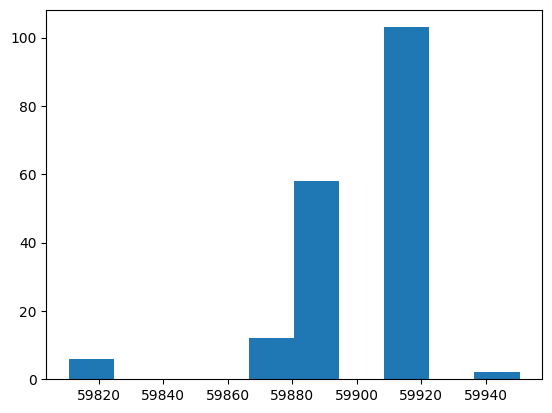

In [13]:
plt.hist(obses['t_min'])

In [14]:
# M31 observations were in the first week of Dec or so
st = Time('2022-12-1')
et = Time('2022-12-10')

m31_nirspec_obses_msk = (st.mjd < obses['t_min'])&(obses['t_min'] < et.mjd)
m31_obses = obses[m31_nirspec_obses_msk]

m31_obses

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str8,int64,str4,str40,str27,float64,float64,float64,float64,float64,str8,str12,float64,float64,str1,str60,float64,str11,str14,str4,str2,str4,int64,str7,str156,str66,str67,str16,bool,float64,str7,str9,str9
image,3,JWST,jw02609-o009_s00025_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,35363.47199999999,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.428840421 42.210454353 11.570106991 42.210454353 11.570106991 42.099461962 11.428840421 42.099461962,mast:JWST/product/jw02609-o009_s00025_nirspec_f100lp-g140h_s2d.jpg,mast:JWST/product/jw02609-o009_s00025_nirspec_f100lp-g140h_s2d.fits,EXCLUSIVE_ACCESS,False,nan,science,103277123,207583588
image,3,JWST,jw02609-o009_s00074_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,17681.736,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.490736415 42.166719239 11.591130196 42.166719239 11.591130196 42.085553602 11.490736415 42.085553602,mast:JWST/product/jw02609-o009_s00074_nirspec_f100lp-g140h_s2d.jpg,mast:JWST/product/jw02609-o009_s00074_nirspec_f100lp-g140h_s2d.fits,EXCLUSIVE_ACCESS,False,nan,science,103277124,207583600
image,3,JWST,jw02609-o009_s12532_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,35363.47199999999,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.226843966 42.327396082 11.498770929 42.327396082 11.498770929 42.096284285 11.226843966 42.096284285,mast:JWST/product/jw02609-o009_s12532_nirspec_f100lp-g140h_s2d.jpg,mast:JWST/product/jw02609-o009_s12532_nirspec_f100lp-g140h_s2d.fits,EXCLUSIVE_ACCESS,False,nan,science,103277125,207583607
image,3,JWST,jw02609-o009_s00026_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,35363.47199999999,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.430279791 42.221100733 11.577696309 42.221100733 11.577696309 42.106260618 11.430279791 42.106260618,mast:JWST/product/jw02609-o009_s00026_nirspec_f100lp-g140h_s2d.jpg,mast:JWST/product/jw02609-o009_s00026_nirspec_f100lp-g140h_s2d.fits,EXCLUSIVE_ACCESS,False,nan,science,103277126,207583614
image,3,JWST,jw02609-o009_s44616_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,35363.47199999999,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.326355641 42.237724898 11.5122476 42.237724898 11.5122476 42.084031068 11.326355641 42.084031068,mast:JWST/product/jw02609-o009_s44616_nirspec_f100lp-g140h_s2d.jpg,mast:JWST/product/jw02609-o009_s44616_nirspec_f100lp-g140h_s2d.fits,EXCLUSIVE_ACCESS,False,nan,science,103277127,207583630
image,3,JWST,jw02609-o009_s00023_nirspec_f100lp-g140h,UNKNOWN,11.54042916666667,42.09025277777778,59920.11351762639,59920.36037075231,35363.47199999999,Infrared,F100LP,1000.0,5000.0,--,Searching for the Alpha-Abundance Bimodality in the M31 Disk,60285.5394212,NIRSPEC,"Nidever, David",2609,GO,JWST,--,CALJWST,POLYGON 11.440108539 42.208851862 11.576867274 42.208851862 11.576867274 42.101293292 11.44010

In [15]:
data_products = Observations.get_product_list(m31_obses)
data_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str40,str71,str1,str70,str9,str28,str8,str1,str7,str5,str4,str52,int64,str9,str16,int64
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,source/target (L3) : association generator,D,mast:JWST/product/jw02609-o009_20230124t220031_spec3_00001_asn.json,INFO,Minimum Recommended Products,ASN,--,CALJWST,1.8.2,2609,jw02609-o009_20230124t220031_spec3_00001_asn.json,6475,103277189,EXCLUSIVE_ACCESS,3
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,source/target (L3) : association pool,D,mast:JWST/product/jw02609_20230124t220031_pool.csv,INFO,Minimum Recommended Products,POOL,--,CALJWST,1.8.2,2609,jw02609_20230124t220031_pool.csv,71671,103277189,EXCLUSIVE_ACCESS,3
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,Preview-Full,D,mast:JWST/product/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.jpg,PREVIEW,--,--,--,CALJWST,1.8.2,2609,jw02609-o009_s00001_nirspec_f100lp-g140h_cal.jpg,385,103277189,EXCLUSIVE_ACCESS,3
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,Preview-Full,D,mast:JWST/product/jw02609-o009_s00001_nirspec_f100lp-g140h_crf.jpg,PREVIEW,--,--,--,CALJWST,1.8.2,2609,jw02609-o009_s00001_nirspec_f100lp-g140h_crf.jpg,385,103277189,EXCLUSIVE_ACCESS,3
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,Preview-Full,D,mast:JWST/product/jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.jpg,PREVIEW,--,--,--,CALJWST,1.8.2,2609,jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.jpg,4162,103277189,EXCLUSIVE_ACCESS,3
103277189,JWST,image,jw02609-o009_s00001_nirspec_f100lp-g140h,exposure (L2b): 2D calibrated exposure average over integrations,D,mast:JWST/product/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits,SCIENCE,Minimum Recommended Products,CAL,--,CALJWST,1.8.2,2609,jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits,30476160,103277189,EXCLUSIVE_ACCESS,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103277063,JWST,image,jw02609009001_0410b_00001_nrs2,exposure/target (L2b/L3): 1D extracted spectrum,S,mast:JWST/product/jw02609009001_0410b_00001_nrs2_x1d.fits,SCIENCE,--,X1D,--,CALJWST,1.8.2,2609,jw02609009001_0410b_00001_nrs2_x1d.fits,34243200,103277219,EXCLUSIVE_ACCESS,2
103277063,JWST,image,jw02609009001_0410b_00001_nrs2,exposure/target (L2b/L3): 1D extracted spectrum,S,mast:JWST/product/jw02609009001_0410b_00001_nrs2_x1d.fits,SCIENCE,--,X1D,--,CALJWST,1.8.2,2609,jw02609009001_0410b_00001_nrs2_x1d.fits,34243200,103277220,EXCLUSIVE_ACCESS,2


In [16]:
set(data_products['description'])

{'FGS guide star fine guide',
 'FGS guide star identification',
 'FGS guide star tracking',
 'FGS1 guide star acquisition',
 'FGS2 guide star acquisition',
 'MSA metadata',
 'Preview-Full',
 'exposure (L1b): Uncalibrated 4D exposure data',
 'exposure (L2a): 2D count rate averaged over integrations',
 'exposure (L2a): 3D countrate per integration',
 'exposure (L2b): 2D calibrated exposure average over integrations',
 'exposure/target (L2b/L3): 1D extracted spectrum',
 'exposure/target (L2b/L3): 2D Calibrated data averaged over integrations',
 'exposure/target (L2b/L3): 2D image of spectrum avg integrations',
 'source/target (L3) : association generator',
 'source/target (L3) : association pool'}

In [17]:
selected_products = data_products[np.array(['MSA metadata' in desc or 'L2a' in desc or 'L2b' in desc for desc in data_products['description']])]
len(selected_products), np.sum(selected_products['size'])/1024/1024/1024 # GB

(9682, 709.1920924186707)

this is ludicrous, but it turns out that's a red herring because there's a lot of repeats.  Count instead the *unique* files:

In [18]:
already_included = set()
include_row = []
for row in selected_products:
    uri = row['dataURI']
    if uri in already_included:
        include_row.append(False)
    else:
        already_included.add(uri)
        include_row.append(True)

unique_selected_products = selected_products[np.array(include_row)]
        
len(unique_selected_products), np.sum(unique_selected_products['size']) / 1024 / 1024 / 1024

(496, 13.637756109237671)

13 GB over ~500 files seems way more sane

In [65]:
results = Observations.download_products(unique_selected_products)

INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits with expected size 30476160. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_crf.fits with expected size 30533760. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.fits with expected size 731520. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_x1d.fits with expected size 388800. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_cal.fits with expected size 30490560. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02

In [41]:
ts = Time.now().iso.replace(' ','_')
fn = f'downloaded_products_{ts}.ecsv'
results.write(fn)
fn

'downloaded_products_2023-02-03_18:08:08.193.ecsv'

## Hook up symlinks for the MSA files

It turns out the MSA files are some of the repeated-many-times files, but the pipeline expects them to be in the right place. Use symlinks to fix that up

In [77]:
msa_products = selected_products[np.array(['msa' in row['dataURI'] for row in selected_products])]

missing = {} # path : filename
present = {} # path : filename
for row in msa_products:
    filename = row['dataURI'].split('/')[-1]
    expected_path = jwst_dl_dir / row['obs_id'] / filename
    if expected_path.is_file():
        present[expected_path] = filename
    else:
        missing[expected_path] = filename
present_invert = {v:k for k, v in present.items()}
len(missing)

0

In [75]:
for expected_path, filename in missing.items():
    real_path = Path('..') / '..' / '..' / present_invert[filename]
    os.symlink(real_path, expected_path)

# Grab the FGS in case

In [42]:
fgs_products = data_products[np.char.startswith(data_products['description'], 'FGS')]
got_already = []
keep_mask = []
for row in fgs_products:
    if row['dataURI'] not in got_already:
        got_already.append(row['dataURI'])
        keep_mask.append(True)
    else:
        keep_mask.append(False)
keep_mask = np.array(keep_mask)
np.sum(keep_mask), len(keep_mask)

(71, 131634)

In [44]:
np.sum(fgs_products[keep_mask]['size']) * 1024**-3 #GB

1.3228976726531982

In [45]:
fgs_results = Observations.download_products(fgs_products[keep_mask])

In [47]:
ts = Time.now().iso.replace(' ','_')
fn = f'downloaded_fgs_products_{ts}.ecsv'
fgs_results.write(fn)
fn

'downloaded_fgs_products_2023-02-01_18:02:26.650.ecsv'

# Run in case the archive is updated

This goes through all the products and identifies those that are missing or mismatched.

In [22]:
nms = []
exist = []
mismatched_size = []
repeats = []
for row in selected_products:
    path = Path('mastDownload' / Path(row['dataURI'].replace('mast:', '').replace('/product/', f'/{row["obs_id"]}/')))
    repeats.append(str(path) in nms)
    nms.append(str(path))
    exist.append(path.is_file())
    if exist[-1]:
        mismatched_size.append(path.stat().st_size - row['size'])
    else:
        mismatched_size.append(0)

changes_table = table.Table()
changes_table['filename'] = nms
changes_table['exist'] = exist
changes_table['size_mismatch'] = mismatched_size
changes_table['repeat'] = repeats

print('dont exist', np.sum(~changes_table['exist']))
print('repeats', np.sum(changes_table['repeat']))
print('mismatched sizes', np.sum(changes_table['size_mismatch']!=0))
changes_table

dont exist 1153
repeats 6120
mismatched sizes 0


filename,exist,size_mismatch,repeat
str108,bool,int64,bool
mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits,False,0,False
mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_crf.fits,False,0,False
mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.fits,False,0,False
mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_x1d.fits,False,0,False
mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_cal.fits,False,0,False
mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_crf.fits,False,0,False
...,...,...,...
mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits,True,0,True
mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits,True,0,True


Irretrievably delete those that are a mismatch.  Need to check for existence because there are some repeats apparently

In [67]:
for row in changes_table:
    if row['size_mismatch'] != 0:
        path = Path(row['filename'])
        if path.is_file():
            path.unlink()

# Also grab association files

In [77]:
assocs = data_products[np.array(['association' in d for d in data_products['description']])]
len(assocs), len(np.unique(assocs['dataURI']))

(3914, 20)

In [78]:
assoc_results = Observations.download_products(assocs)

INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_20230124t220031_spec3_00001_asn.json with expected size 6475. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609_20230124t220031_pool.csv with expected size 71671. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_20230124t220031_spec3_00001_asn.json with expected size 6475. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609_20230124t220031_pool.csv with expected size 71671. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00003_nirspec_f100lp-g140h/jw02609-o009_20230124t220031_spec3_00001_asn.json with expected size 6475. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw02609-o009_s00003_nirspec_f100lp-g140h/jw02609_20230124t220031_pool.csv with expected size 

In [79]:
ts = Time.now().iso.replace(' ','_')
fn = f'downloaded_assoc_products_{ts}.ecsv'
assoc_results.write(fn)
fn

'downloaded_assoc_products_2023-02-03_18:35:13.698.ecsv'

# Per-exposure snippets

Some of this is useful to grab an individual dataset's files.  For example this is for an uncal:

In [ ]:
obses = Observations.query_criteria(proposal_id=2609, obs_collection='JWST')
prods = Observations.get_product_list(obses)
matching = prods[np.array(['jw02609009001_04101_00001_nrs2' in row['productFilename'] for row in prods])]

In [ ]:
ufilenames = np.unique(matching['productFilename'])
uncal = [fn for fn in ufilenames if 'uncal.fits' in fn]
assert len(uncal) == 1
uncalfn = uncal[0]

todl = matching[uncalfn==matching['productFilename']][:1]
result = Observations.download_products(todl)
uncal_dm = datamodels.open(result['Local Path'][0])